# Plots Available

def plot_x_v_ys(self, df: pd.DataFrame, x: str, ys: list, **plt_kwargs) -> None:
        """Plots x vs. ys in a singular dataframe on one graph

def plot_module_jvs(self, jvfolder: str, ax: plt.axes = None, **plt_kwargs) -> plt.axes:
        """Plot JVs in given JV folder

def plot_string_mpp(self, mppfolder: str, ax: plt.axes = None, **plt_kwargs) -> plt.axes:
        """Plot MPP information in given MPP folder

def plot_jvs(self, jvfiles: list, ax: plt.axes = None, **plt_kwargs) -> plt.axes:
        """Plot JVs for input JV files

def plot_mpps(self, mppfiles: list, ax: plt.axes = None, **plt_kwargs) -> plt.axes:
        """Plots MPPs for input MPP files

def plot_xy_scalars(self, paramfiles: list, x: str, y: str, ax: plt.axes = None, **plt_kwargs) -> plt.axes:
        """Plot x vs. y for a set of scalar files

def plot_xy2_scalars(
        self, paramfiles: list, x: str, ys: list, ax: plt.axes = None, **plt_kwargs
    ) -> plt.axes:
        """Plots x vs. y for a set of scalar files

def plot_xyz_scalars(
        self, paramfile: str, x: str, y: str, z: str, ax: plt.axes = None, **plt_kwargs
    ) -> plt.axes:

# Example Analysis

Load in packages

In [2]:
# %matplotlib inline

from parasol.filestructure import FileStructure
from parasol.analysis.grapher import Grapher
from parasol.analysis.analysis import Analysis

import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Initialize packages

In [3]:
filestructure = FileStructure()
grapher = Grapher()
analysis = Analysis()

Set root directory, pull data

In [8]:

# Method 1
# Set Root Directory (folder that holds test folders), get list of folders
# root_dir = 'C:\\Users\\seand\OneDrive - UC San Diego\\Documents\\PARASOL\\Characterization'\
# test_folders = filestructure.get_tests(rootdir=root_dir)


# Method 2
# Hardcode which files to look at, get list of folders
test_folders = ['C:\\Users\\seand\OneDrive - UC San Diego\\Documents\\PARASOL\\Characterization\\x20230710\\x20230710_A12D80852' ,
                'C:\\Users\\seand\OneDrive - UC San Diego\\Documents\\PARASOL\\Characterization\\x20230710\\x20230710_A12D80858']

# Generate list of files in each folder seperated by test
analyzed_files = filestructure.get_files(test_folders, "Analyzed")
mpp_files = filestructure.get_files(test_folders, "MPP")
jv_files = filestructure.get_files(test_folders, "JV")
test_folders_dict = filestructure.map_test_folders(test_folders)

plt.rcParams["figure.figsize"] = (20,10)

C:\Users\seand\OneDrive - UC San Diego\Documents\PARASOL\\Characterization\x20230710\x20230710_A12D80852


Plot MPP v JV

C:\Users\seand\AppData\Local\Temp\ipykernel_56020\2883076044.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
C:\Users\seand\AppData\Local\Temp\ipykernel_56020\2883076044.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
C:\Users\seand\AppData\Local\Temp\ipykernel_56020\2883076044.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
C:\Users\seand\AppData\Local\Temp\ipykernel_56020\2883076044.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
C:\Users\seand\AppData\Local\Temp\ipykernel_56020\2883076044.py:33: UserWarning: Matplotlib is curre

<Figure size 1440x720 with 0 Axes>

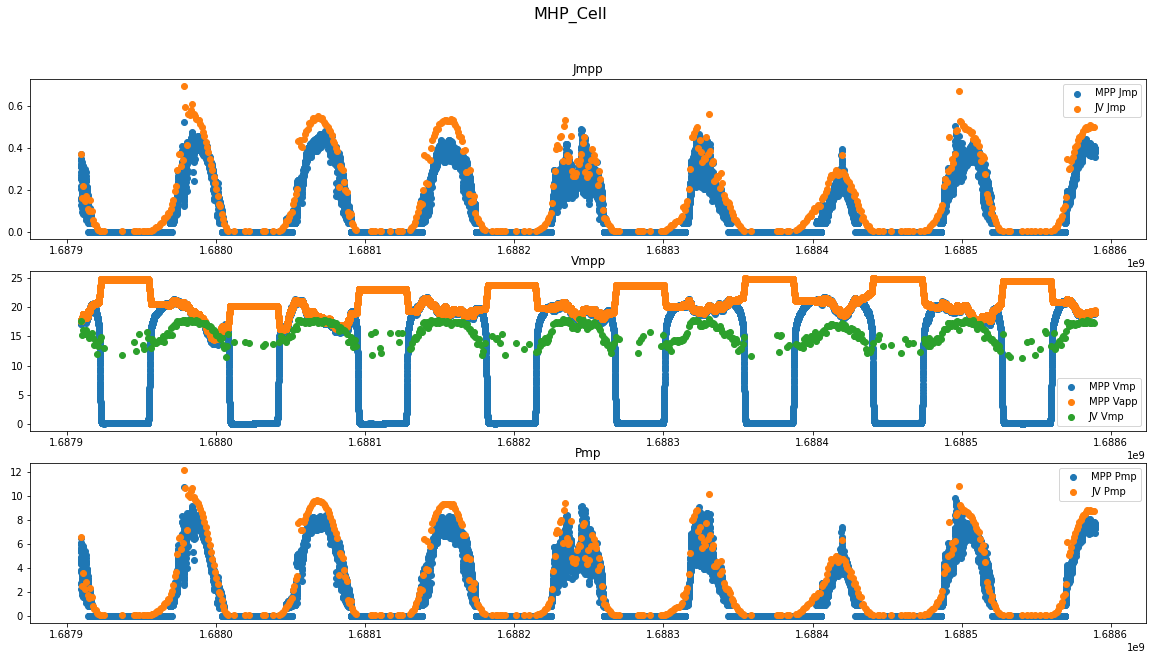

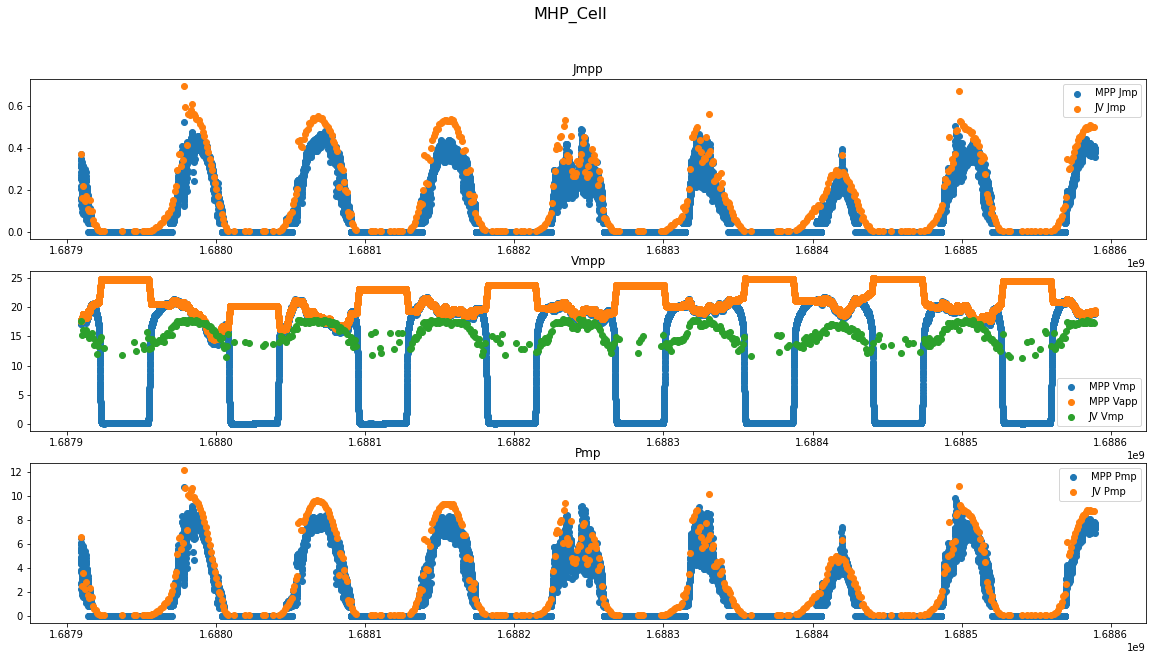

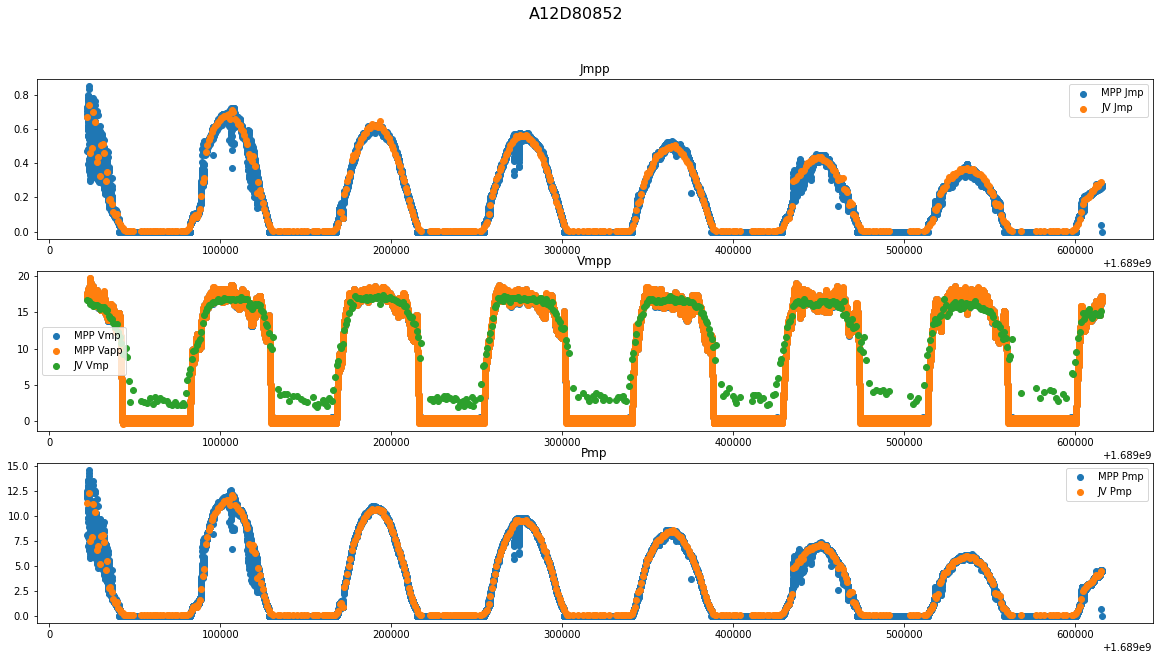

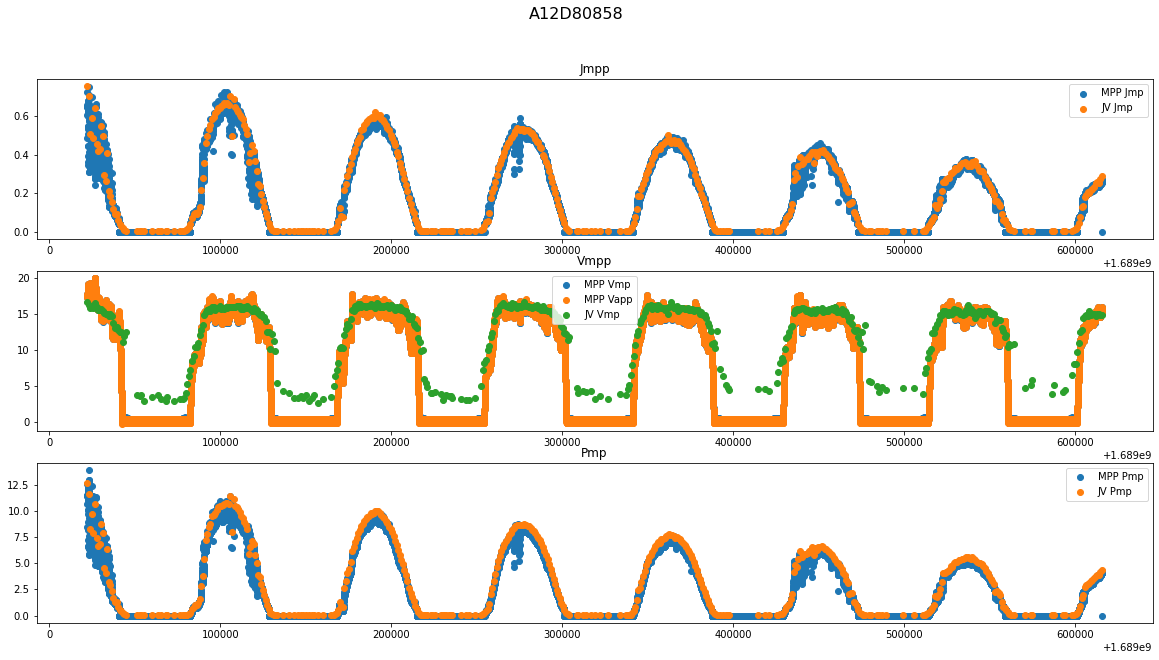

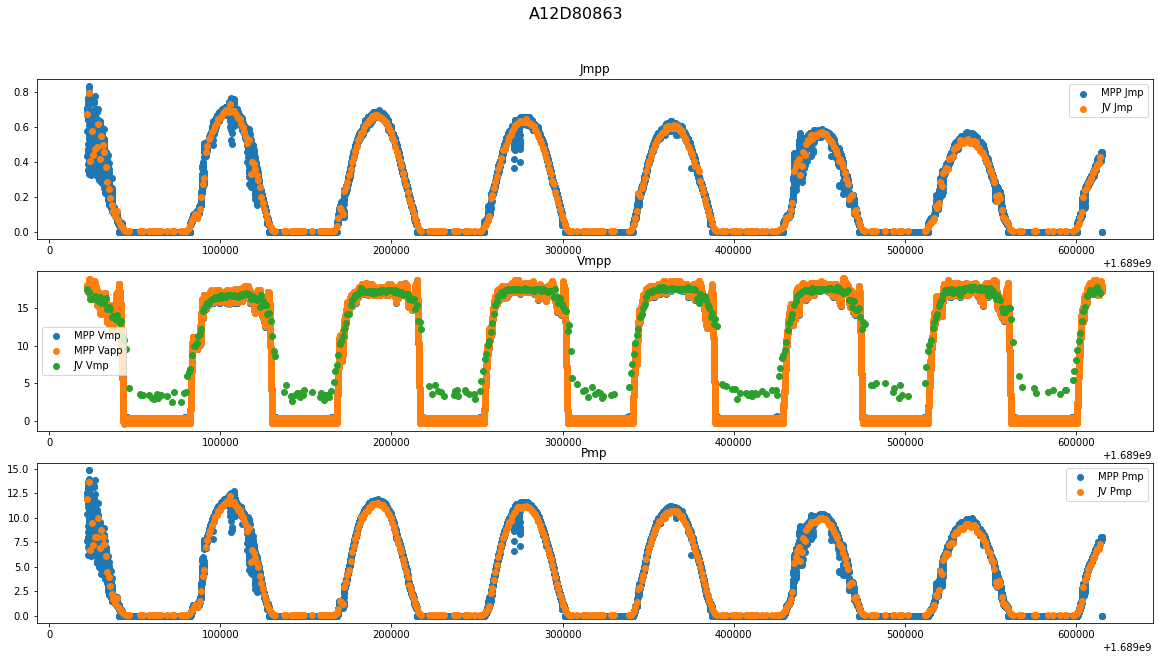

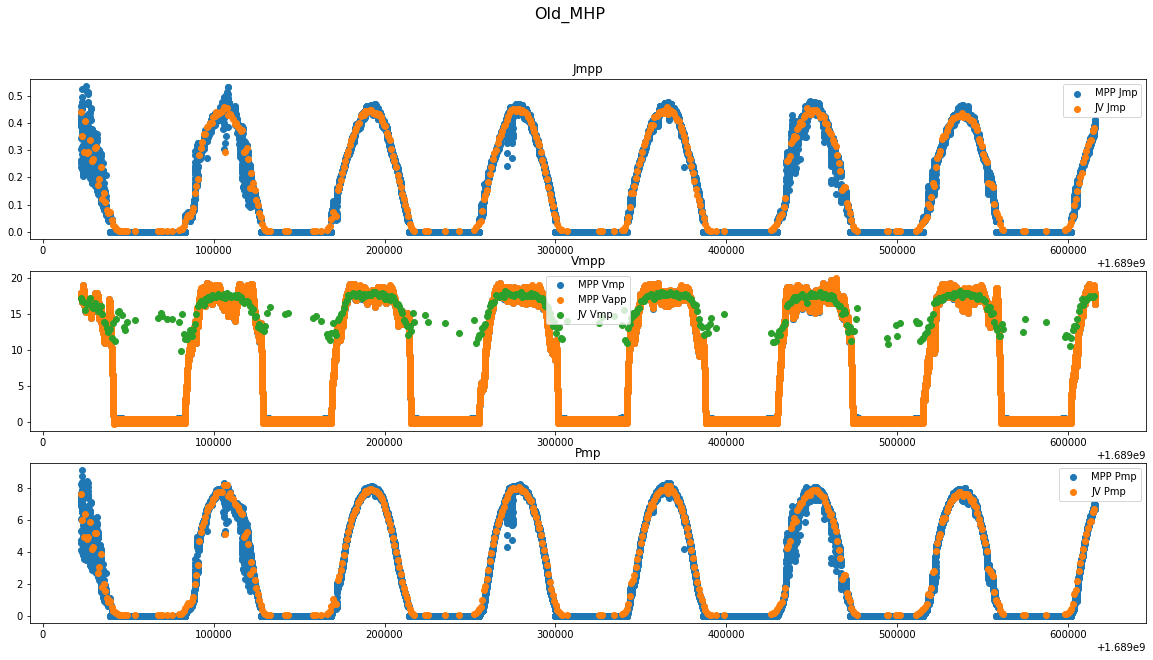

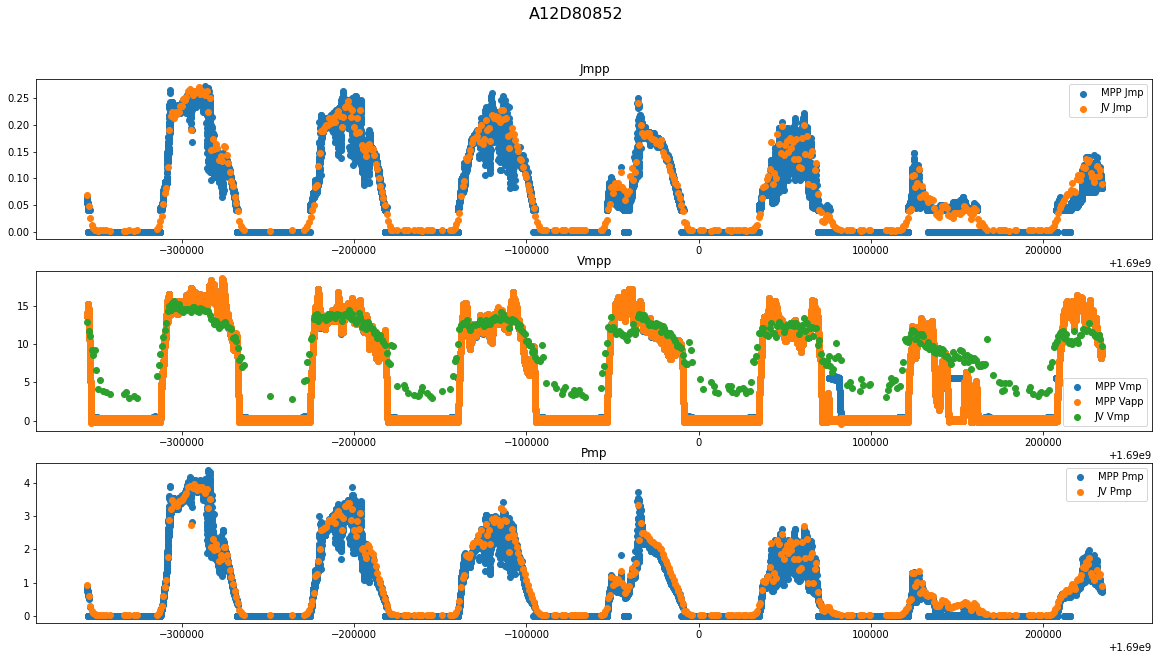

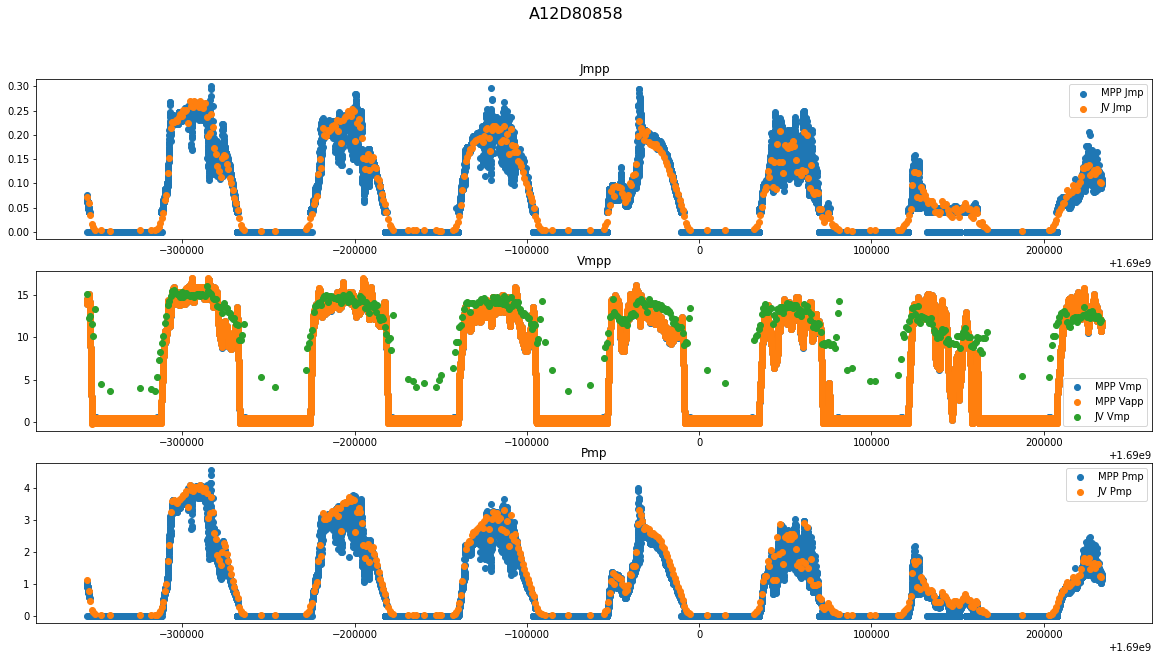

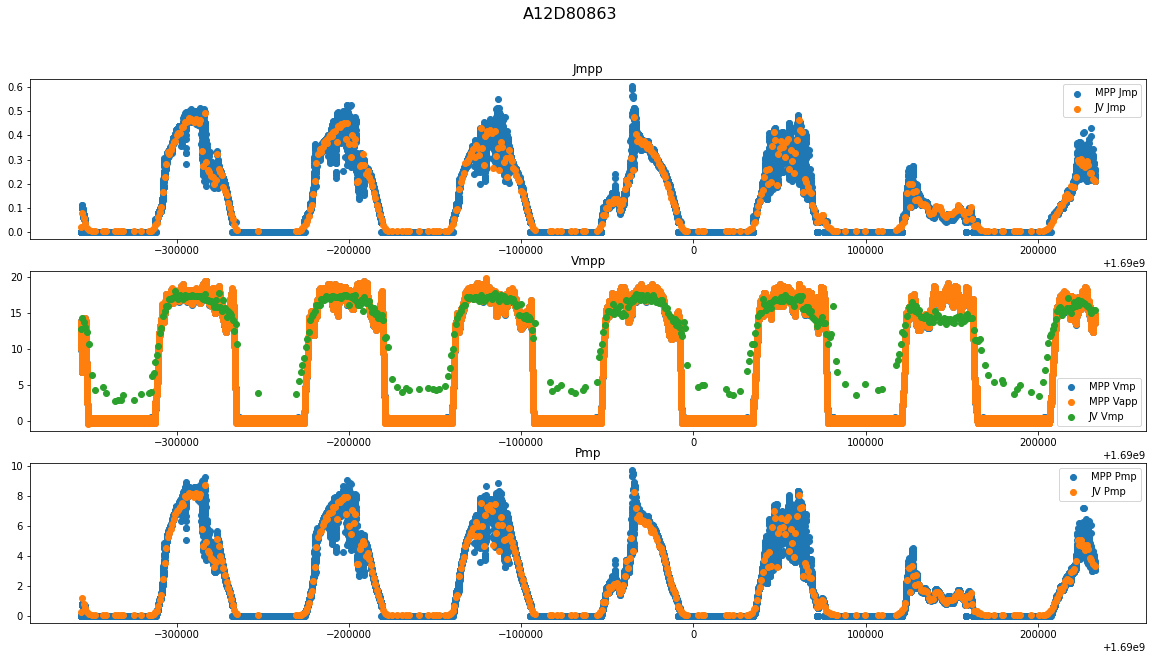

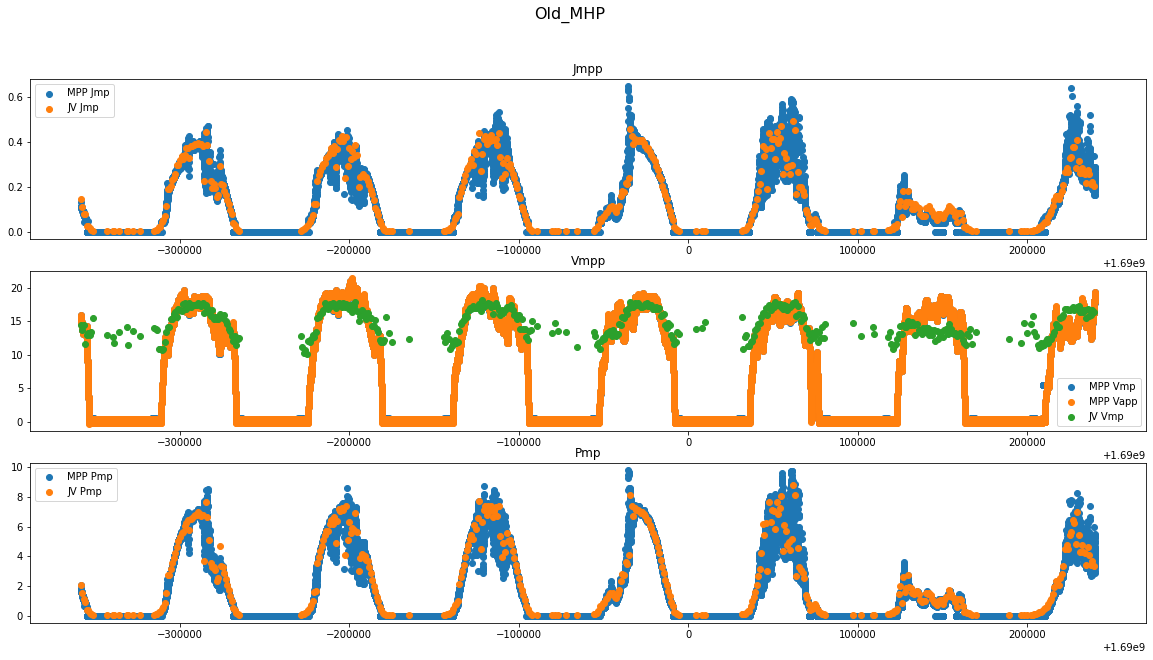

In [14]:
plt.clf()

# cycle through each device on test
for idx, test in enumerate(mpp_files):
    
    # Generaic load all data and plot
    figure, axes = plt.subplots(3)

    mpp_t, mpp_vapp, mpp_v, mpp_i, mpp_j, mpp_p = analysis.load_mpp_files(mpp_file_paths=mpp_files[idx])
    jv_t, jv_vapp, jv_v_fwd, jv_i_fwd, jv_j_fwd, jv_p_fwd, jv_v_rev, jv_i_rev, jv_j_rev, jv_p_rev = analysis.load_jv_files(jv_file_paths=jv_files[idx])
    scalar_df = pd.read_csv((analyzed_files[idx])[0])

    axes[0].scatter(mpp_t,mpp_j, label = f'MPP Jmp')
    axes[0].scatter(scalar_df['Time (Epoch)'],(scalar_df['REV Jmp (mA/cm2)']+scalar_df['FWD Jmp (mA/cm2)'])/2, label = f'JV Jmp')
    
    axes[1].scatter(mpp_t,mpp_v, label = f'MPP Vmp')
    axes[1].scatter(mpp_t,mpp_vapp, label = f'MPP Vapp')
    axes[1].scatter(scalar_df['Time (Epoch)'],(scalar_df['REV Vmp (V)']+scalar_df['FWD Vmp (V)'])/2, label = f'JV Vmp')
    
    axes[2].scatter(mpp_t,mpp_p, label = f'MPP Pmp')
    axes[2].scatter(scalar_df['Time (Epoch)'],(scalar_df['REV Pmp (mW/cm2)']+scalar_df['FWD Pmp (mW/cm2)'])/2, label = f'JV Pmp')

    axes[0].set_title('Jmpp')
    axes[1].set_title('Vmpp')
    axes[2].set_title('Pmp')

    for ax in axes:
        ax.legend()
        
    name = filestructure.filepath_to_runinfo(analyzed_files[idx][0])['name']
    figure.suptitle(f'{name}', fontsize=16)

    figure.show()

Plot MPPs

C:\Users\seand\AppData\Local\Temp\ipykernel_56020\2289008461.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


<Figure size 1440x720 with 0 Axes>

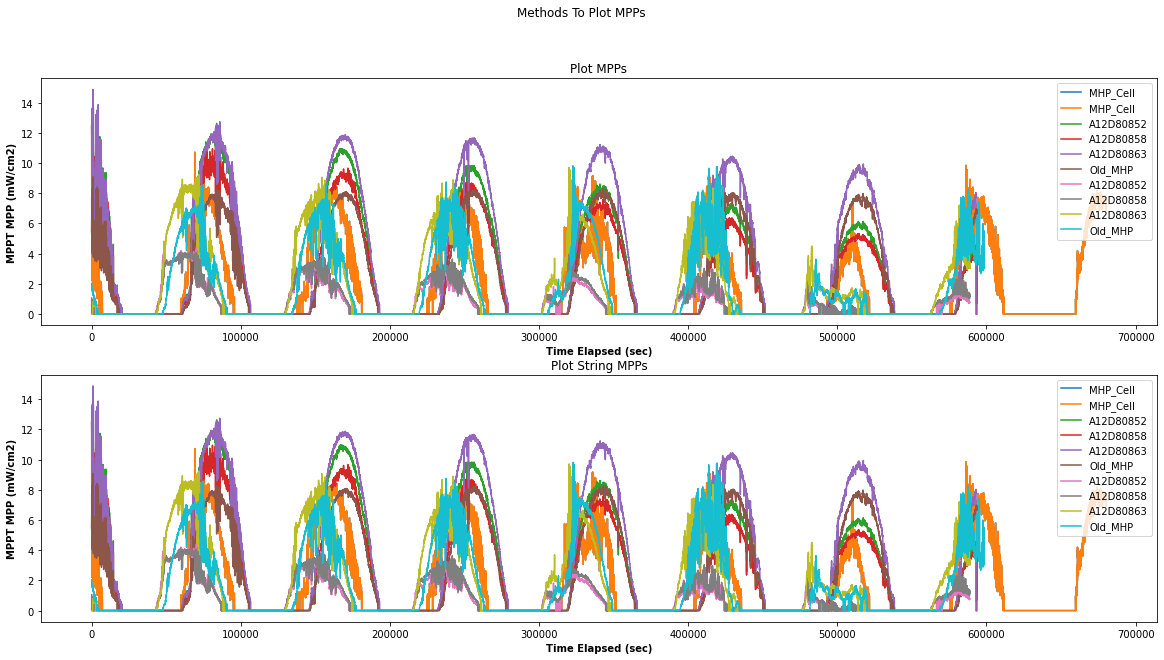

In [15]:
plt.clf()
figure, axes = plt.subplots(2)

for idx, test in enumerate(mpp_files):

    mpp_folder = (test_folders_dict[test_folders[idx]]['MPP'])[0]

    # figure, axes = plt.subplots(2)
    labels = filestructure.filepath_to_runinfo(analyzed_files[idx][0])['name']
    grapher.plot_mpps(mpp_files[idx], axes[0], labels)
    axes[0].set_title('Plot MPPs')
    grapher.plot_string_mpp(mpp_folder, axes[1], labels)
    axes[1].set_title('Plot String MPPs')

figure.suptitle('Methods To Plot MPPs')
figure.show()

Plot JVs

C:\Users\seand\AppData\Local\Temp\ipykernel_56020\3205430663.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


<Figure size 1440x720 with 0 Axes>

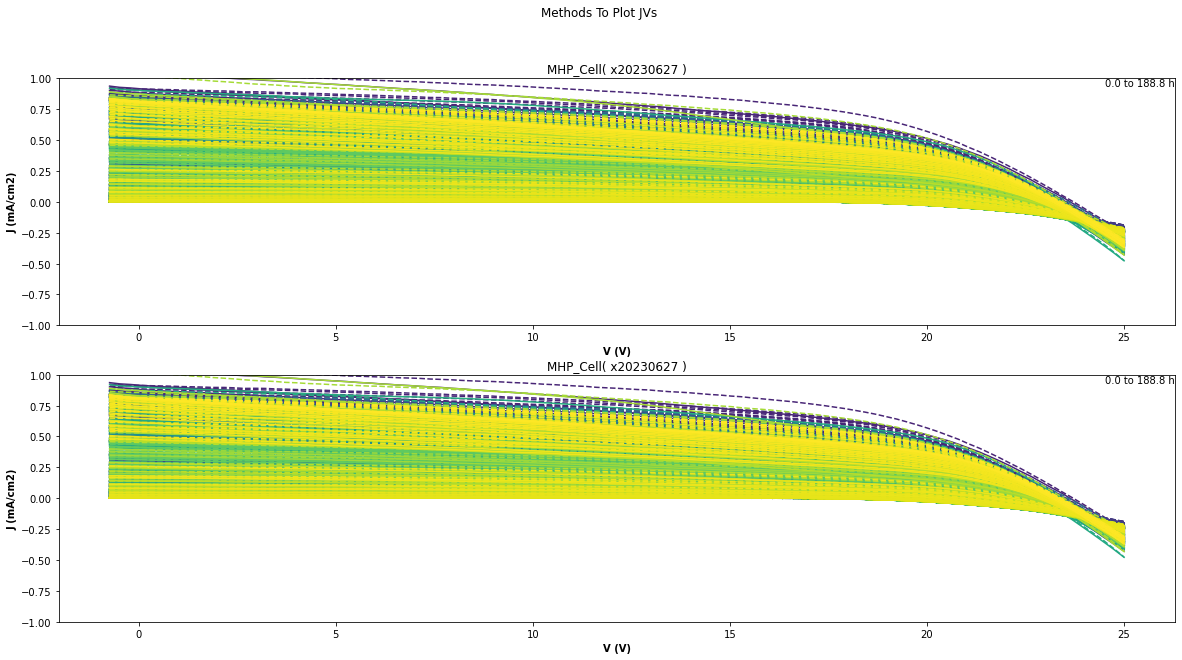

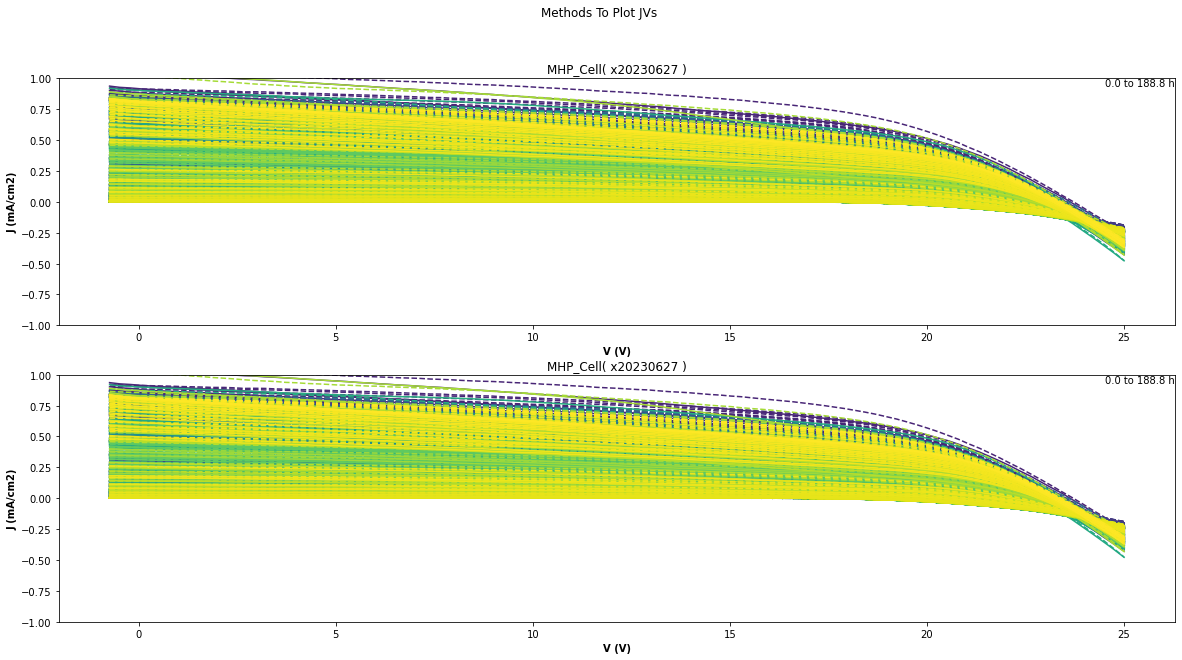

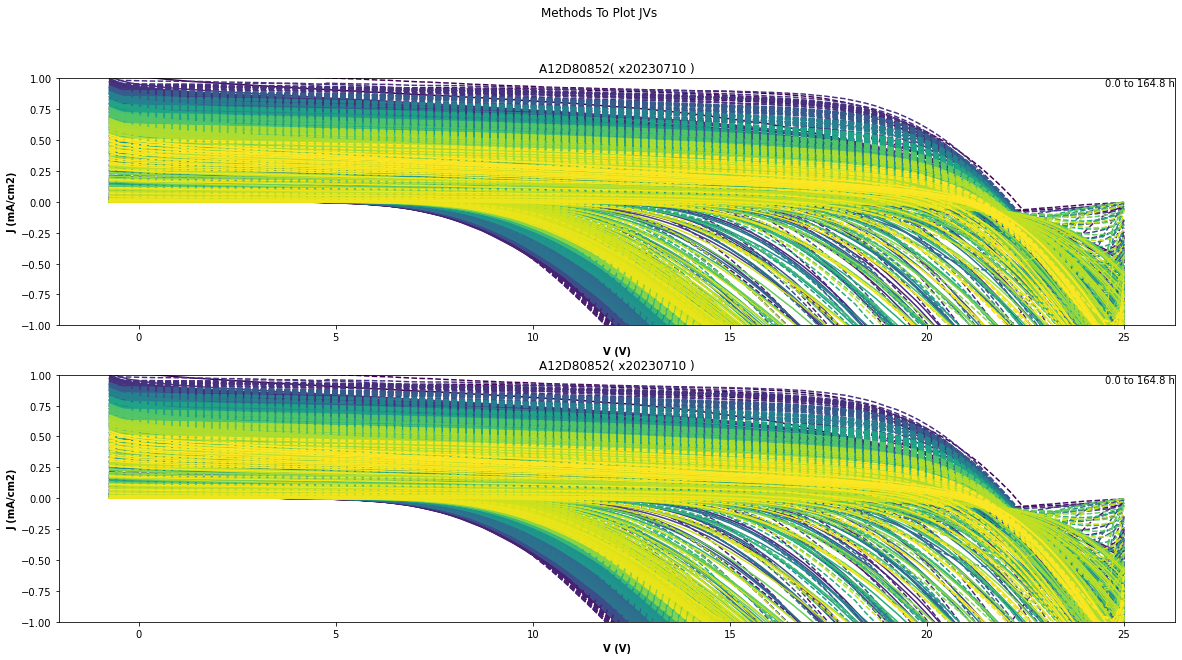

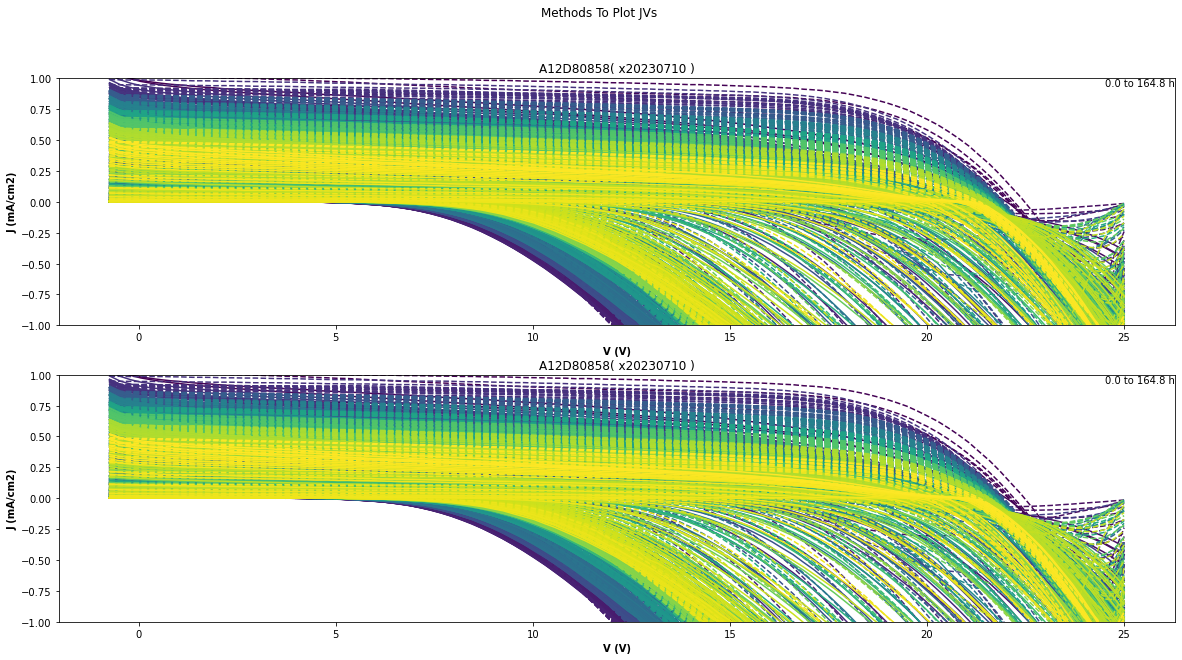

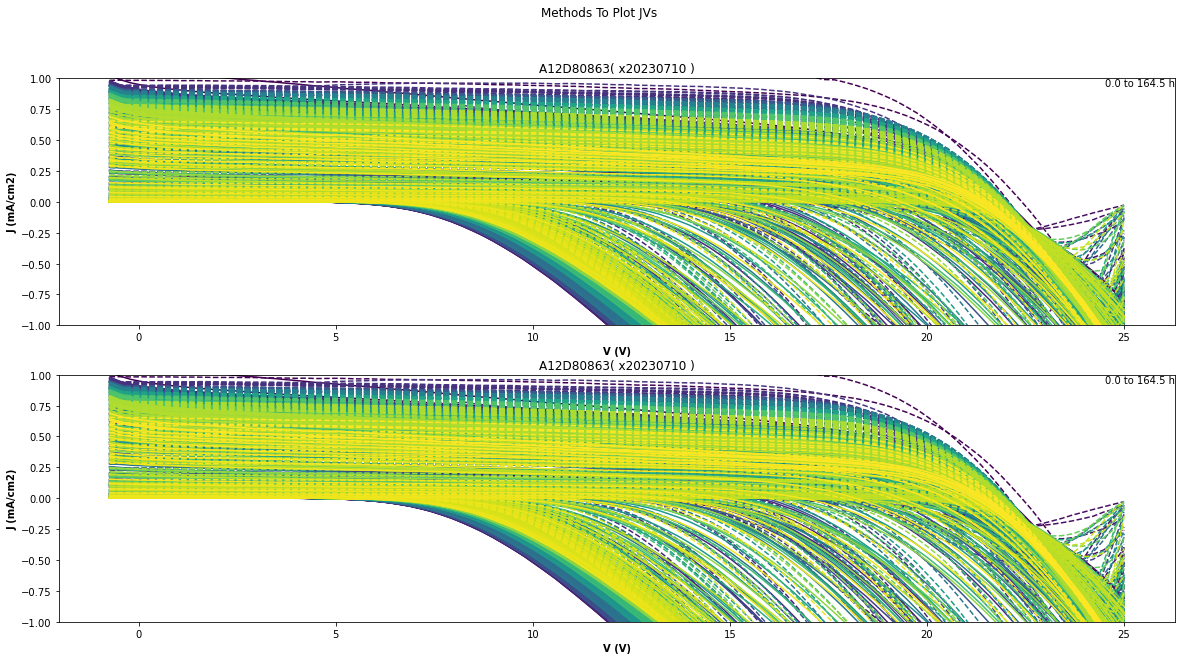

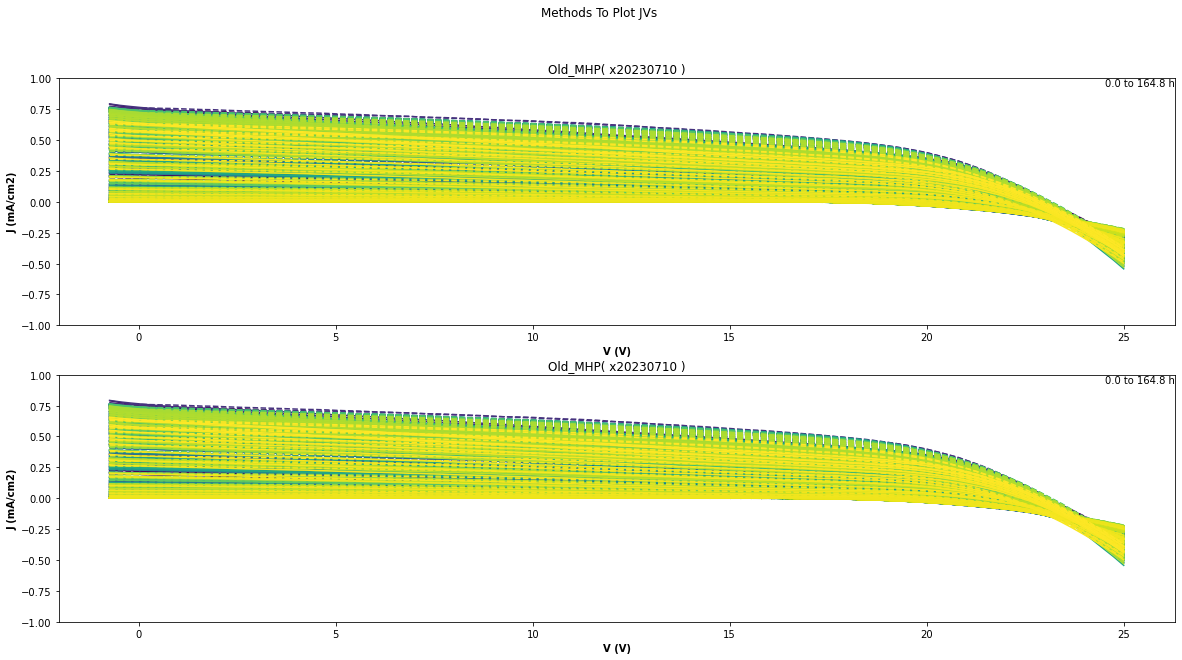

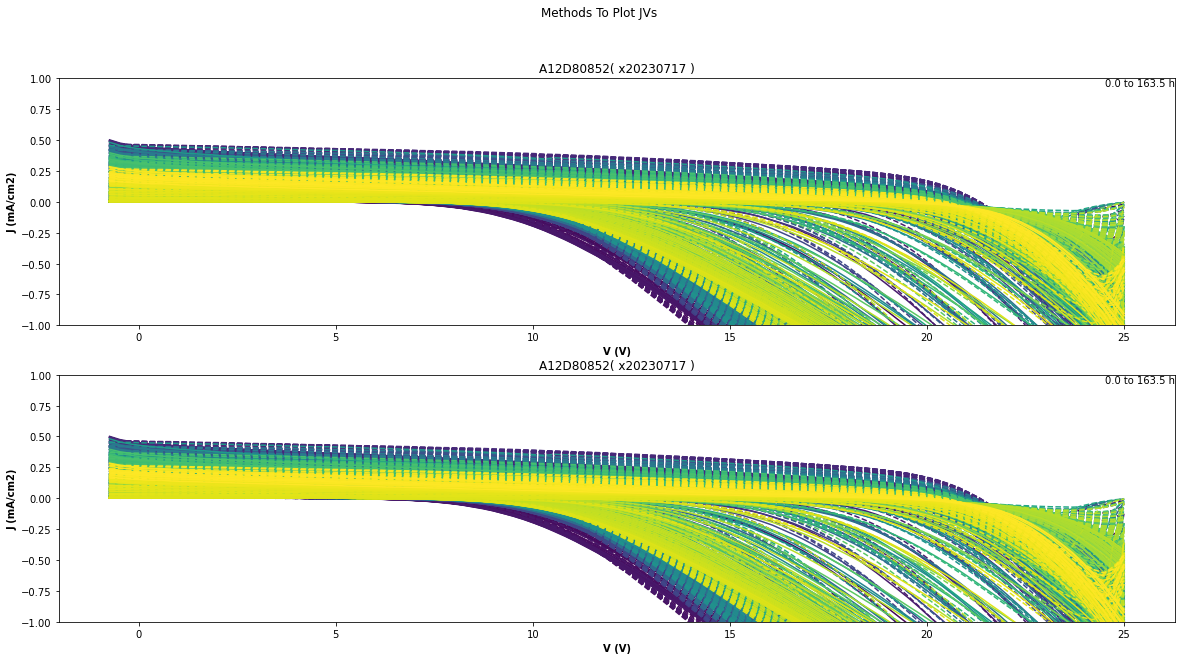

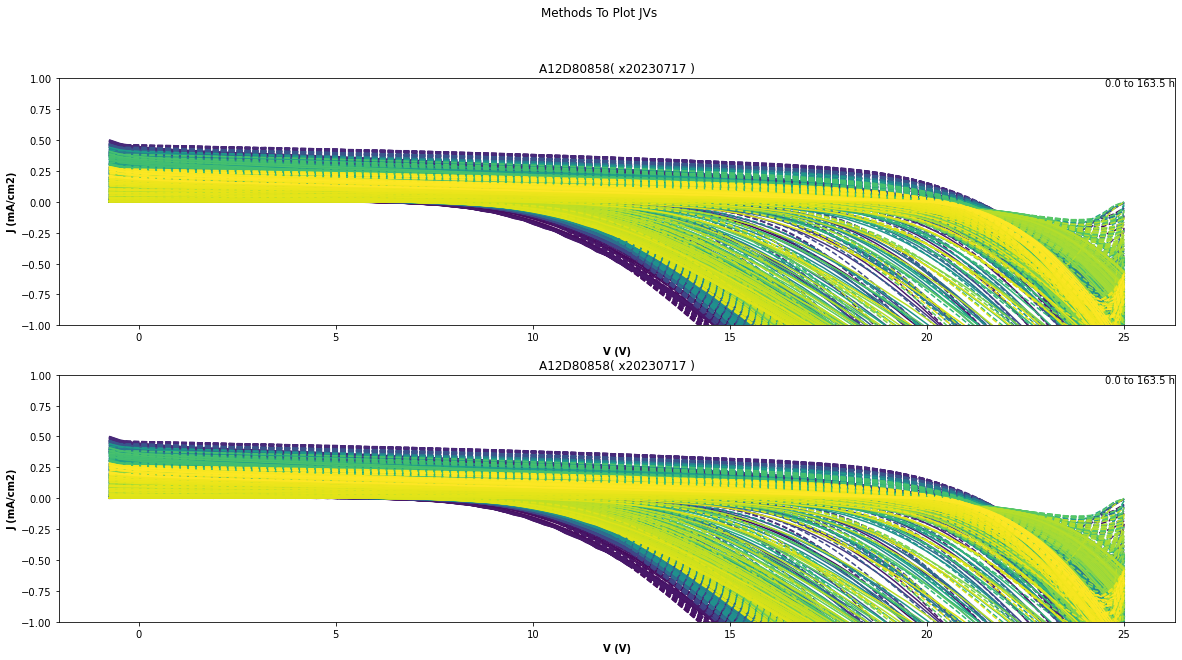

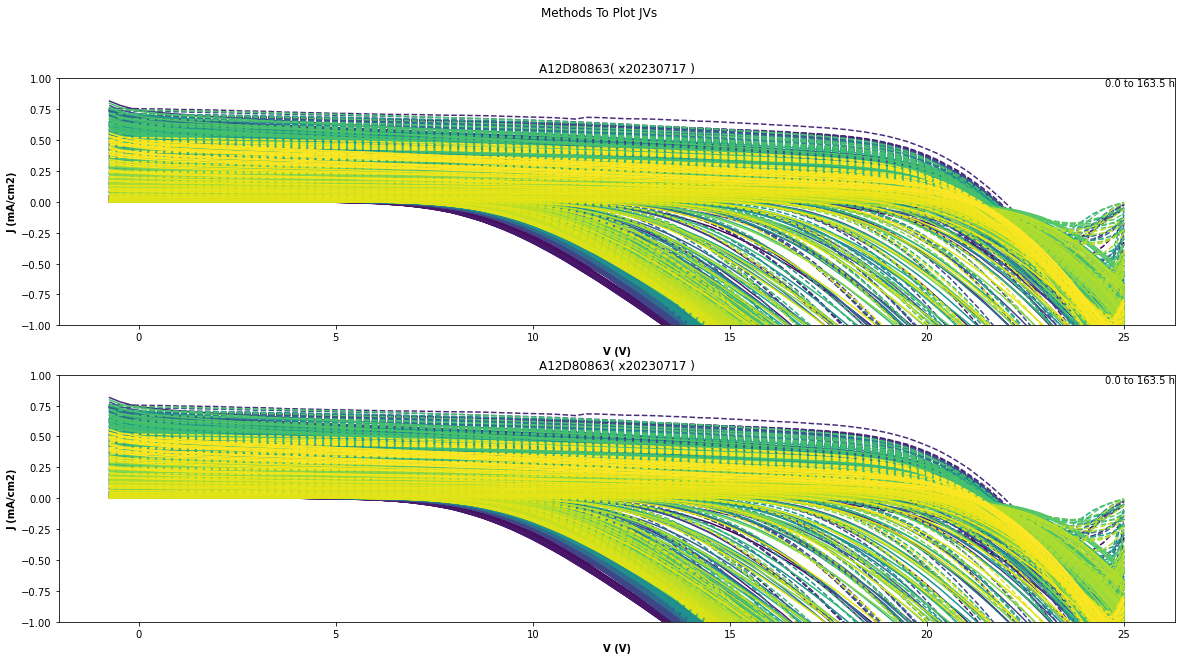

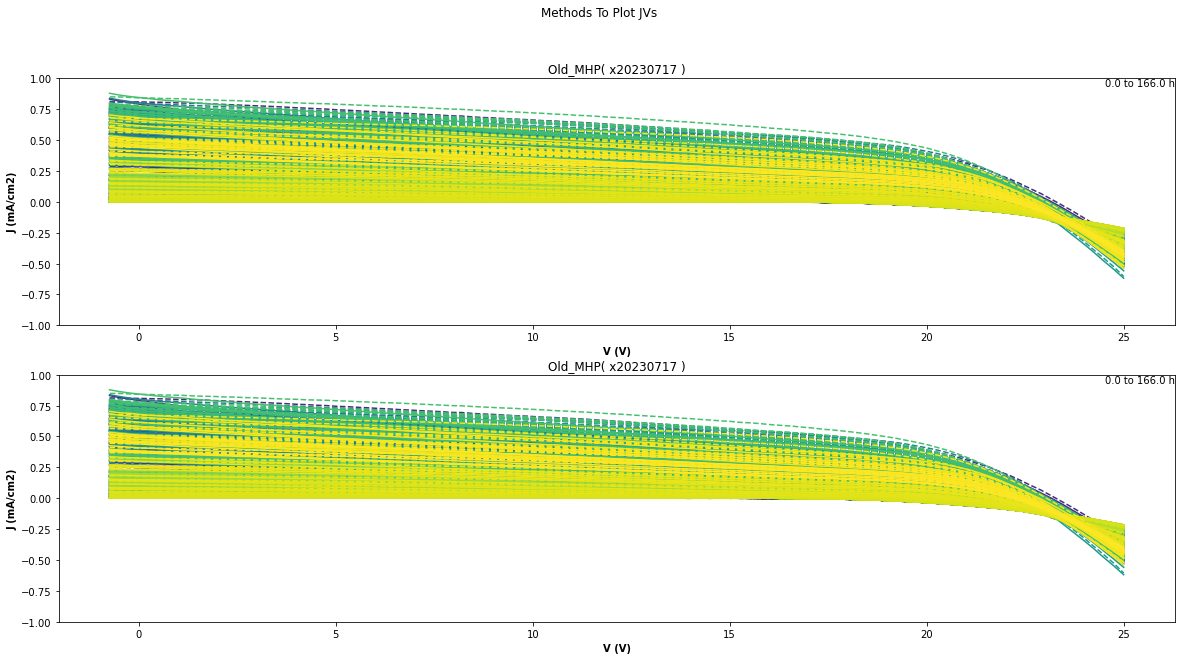

In [16]:
plt.clf()

for idx, test in enumerate(jv_files):

    jv_folder = (test_folders_dict[test_folders[idx]]['JV'])[0]
    figure, axes = plt.subplots(2)
    
    grapher.plot_jvs(jv_files[idx], axes[0])
    grapher.plot_module_jvs(jv_folder, axes[1])

    for ax in axes:
        ax.set_ylim(-1,1)
        
    figure.suptitle('Methods To Plot JVs')
    figure.show()

Setup parameters to Plot

In [17]:
# Print Parameters Availible to plot
#print(grapher.variable_dict.keys())

files_to_plot = analyzed_files
y_axis = "FWD Jsc"
y2_axis = "REV Jsc"
x_axis = "Time Elapsed"
z_axis = "FWD Voc"

Create 1 Figure showing data from series (xy_scalars example)

C:\Users\seand\AppData\Local\Temp\ipykernel_56020\3626066847.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


<Figure size 1440x720 with 0 Axes>

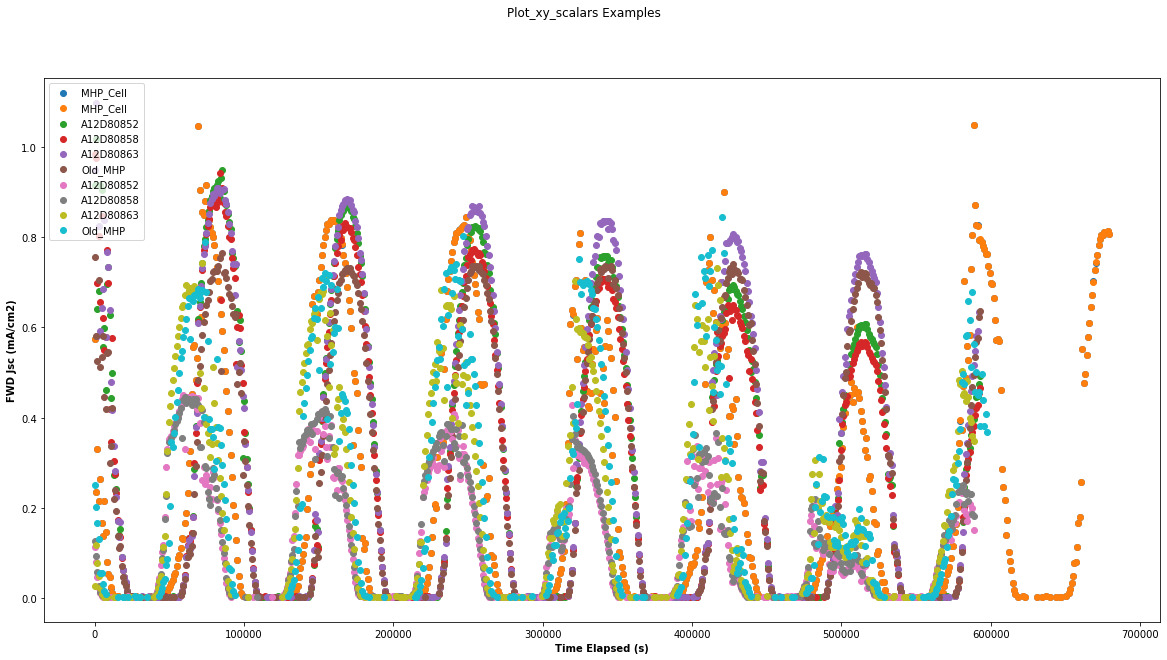

In [18]:
# Create Figure
plt.clf()
figure, axes = plt.subplots(1)

# Cycle through each testfile
for idx, sublist in enumerate(files_to_plot):

    
    # Cycle through each file
    for file in sublist: 

        # Plot
        grapher.plot_xy_scalars(
            paramfiles = [file],
            x = grapher.variable_dict[x_axis], 
            y = grapher.variable_dict[y_axis],
            ax = axes,
            labels = filestructure.filepath_to_runinfo(files_to_plot[idx][0])['name']

            )

figure.suptitle('Plot_xy_scalars Examples')
figure.show()

Create 1 Figure showing data from series (xy2_scalars example)

C:\Users\seand\AppData\Local\Temp\ipykernel_56020\446674623.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


<Figure size 1440x720 with 0 Axes>

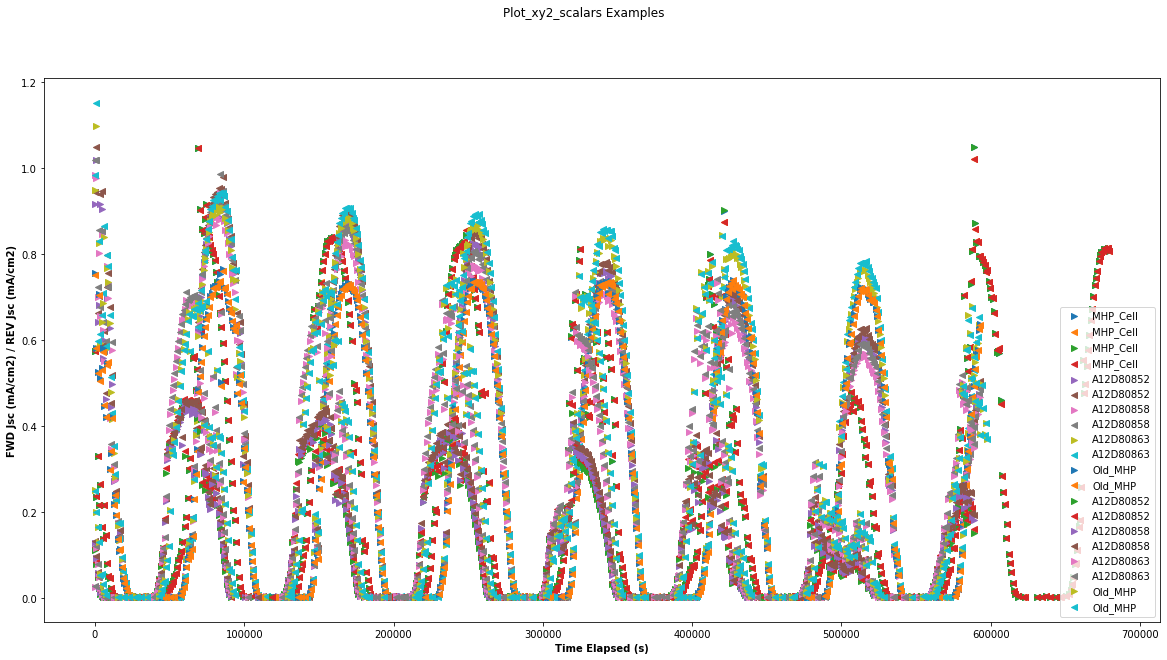

In [19]:
# Create Figure
plt.clf()
figure, axes = plt.subplots(1)

# Cycle through each testfile
for idx, sublist in enumerate(files_to_plot):
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xy2_scalars(
            paramfiles = [file],
            x = grapher.variable_dict[x_axis], 
            ys = [grapher.variable_dict[y_axis], grapher.variable_dict[y2_axis]],
            ax = axes,
            labels = filestructure.filepath_to_runinfo(files_to_plot[idx][0])['name'], 
            )

figure.suptitle('Plot_xy2_scalars Examples')
figure.show()


Create multiple figures shwing data from series (plot_xyz_scalar example)

C:\Users\seand\AppData\Local\Temp\ipykernel_56020\3509719915.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


<Figure size 1440x720 with 0 Axes>

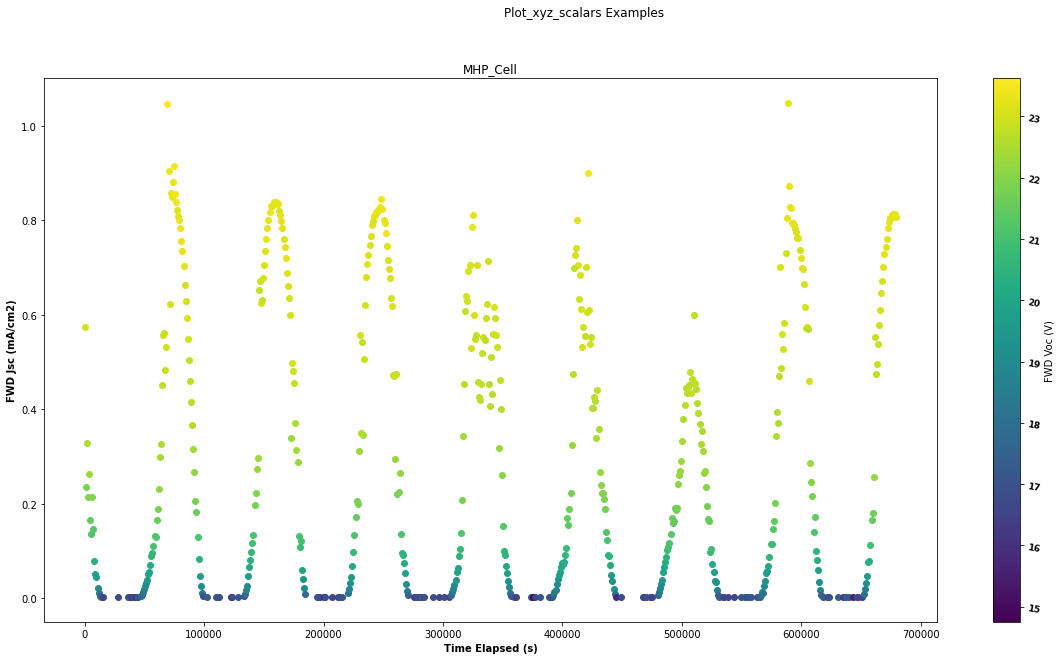

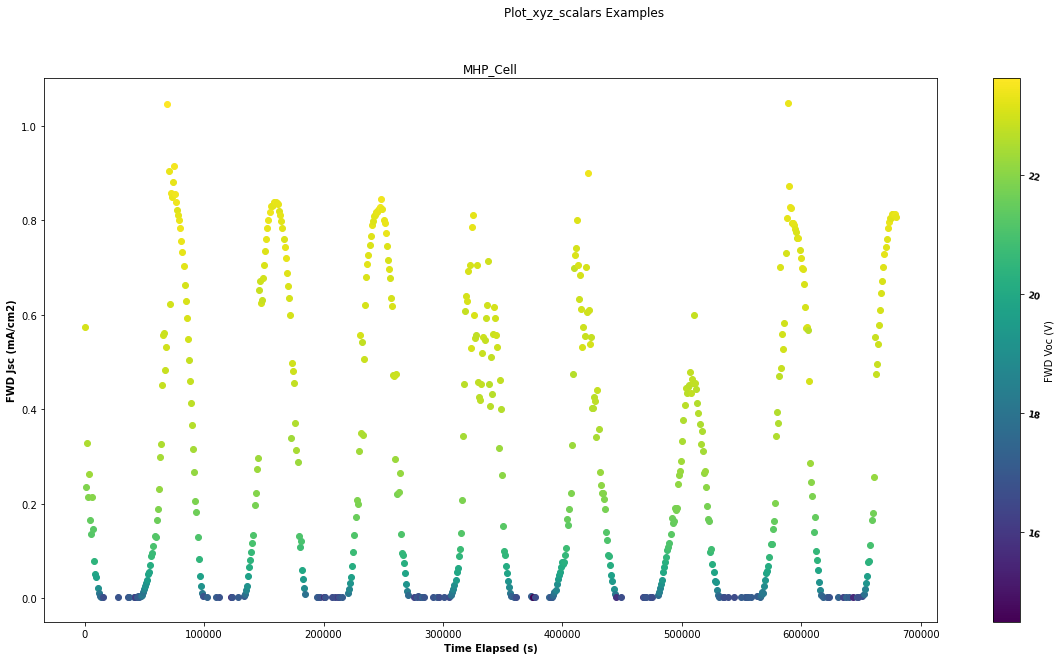

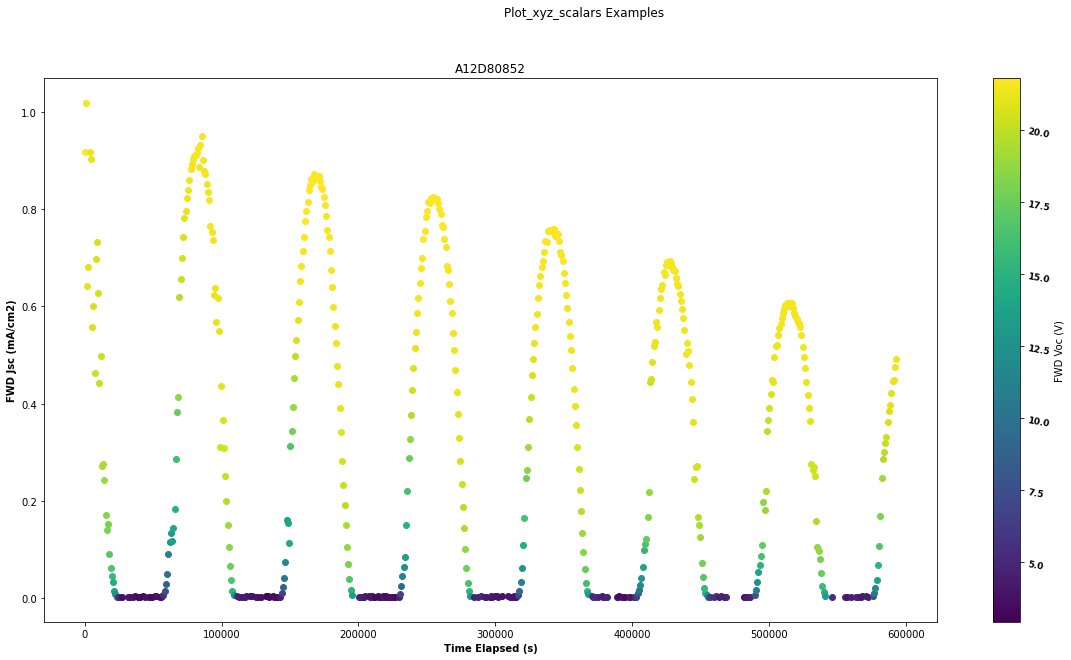

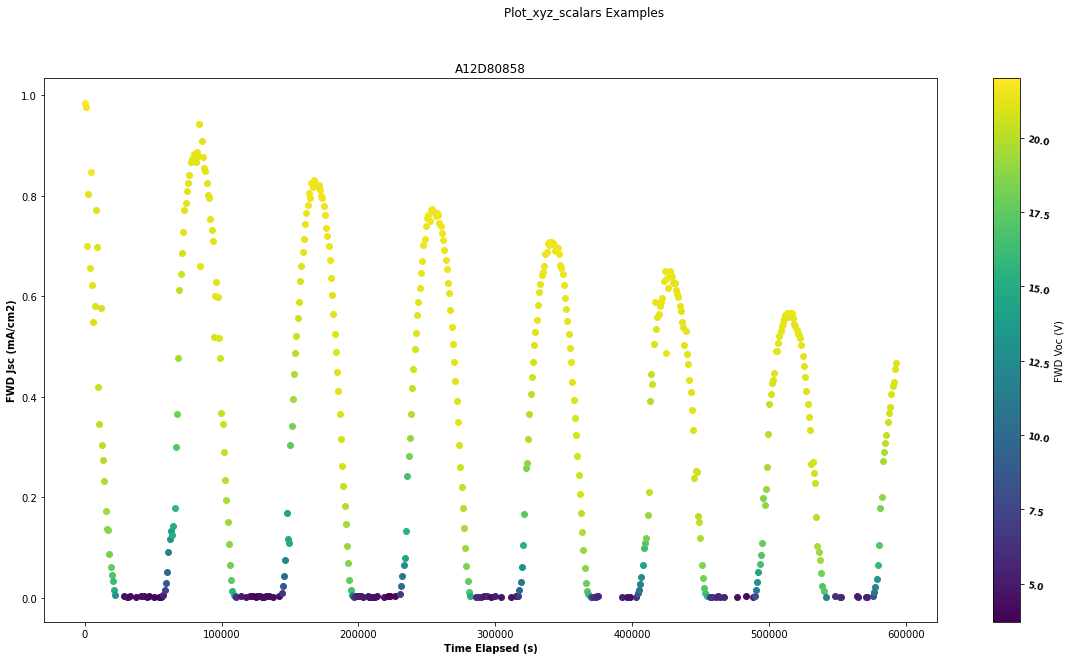

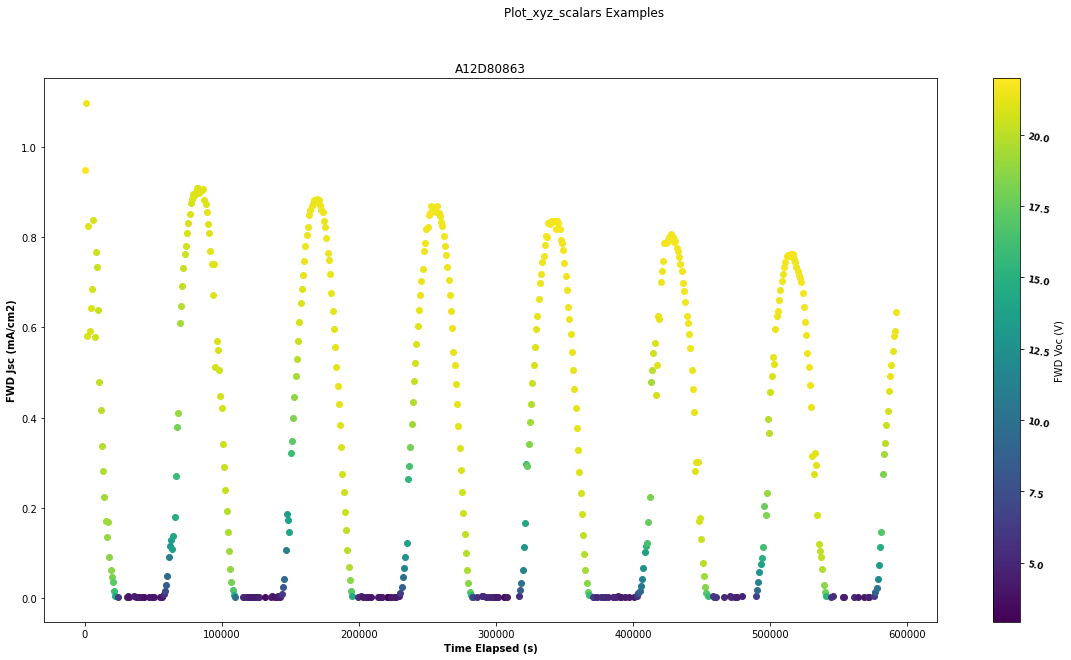

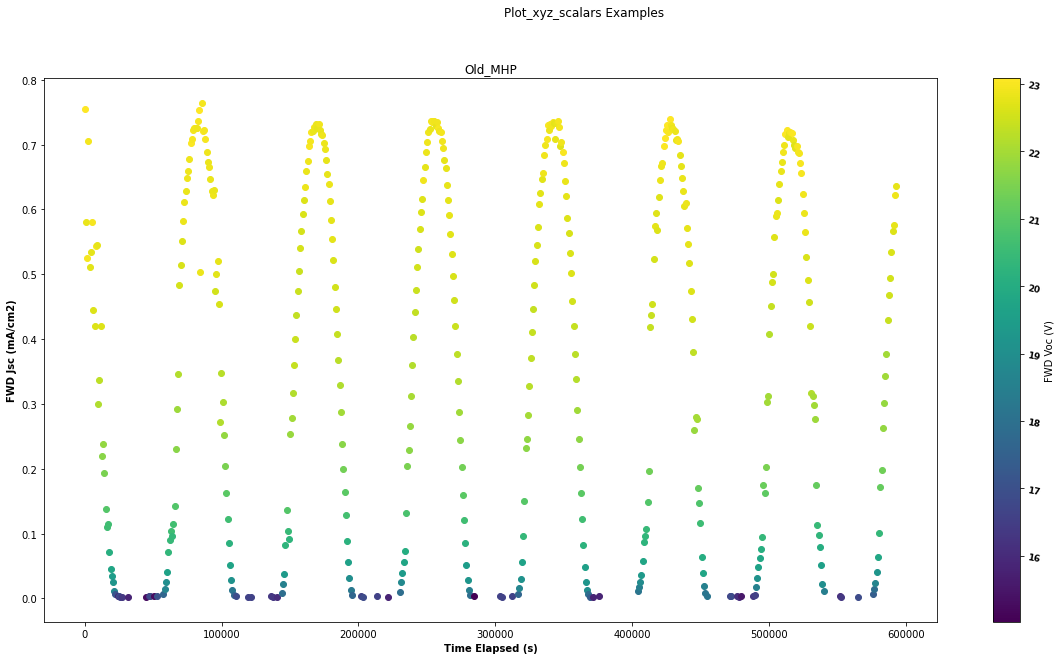

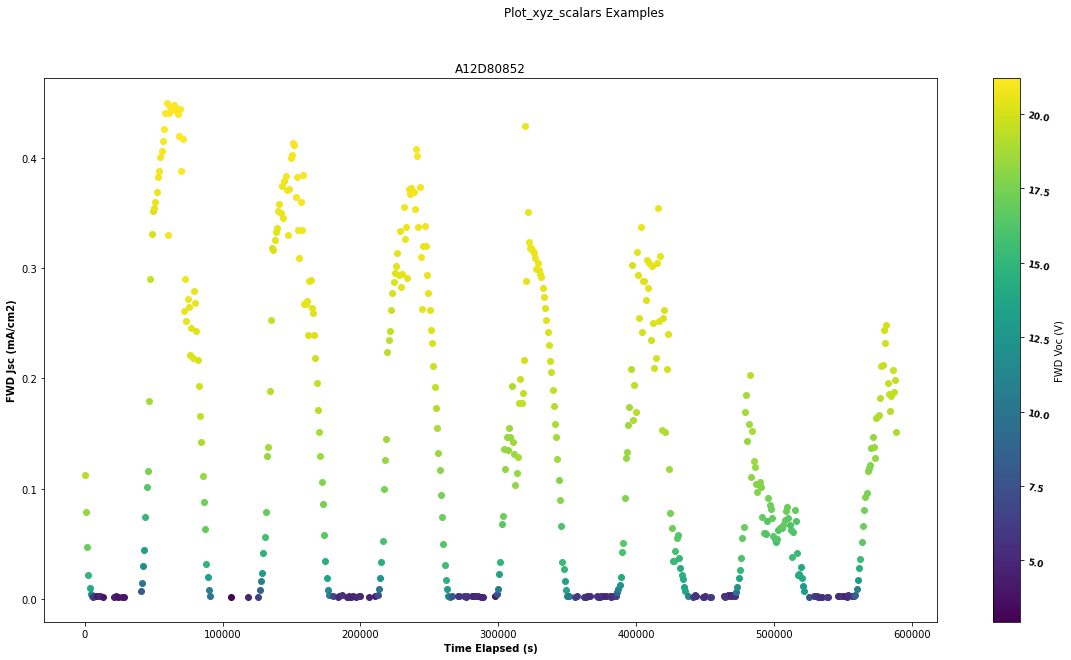

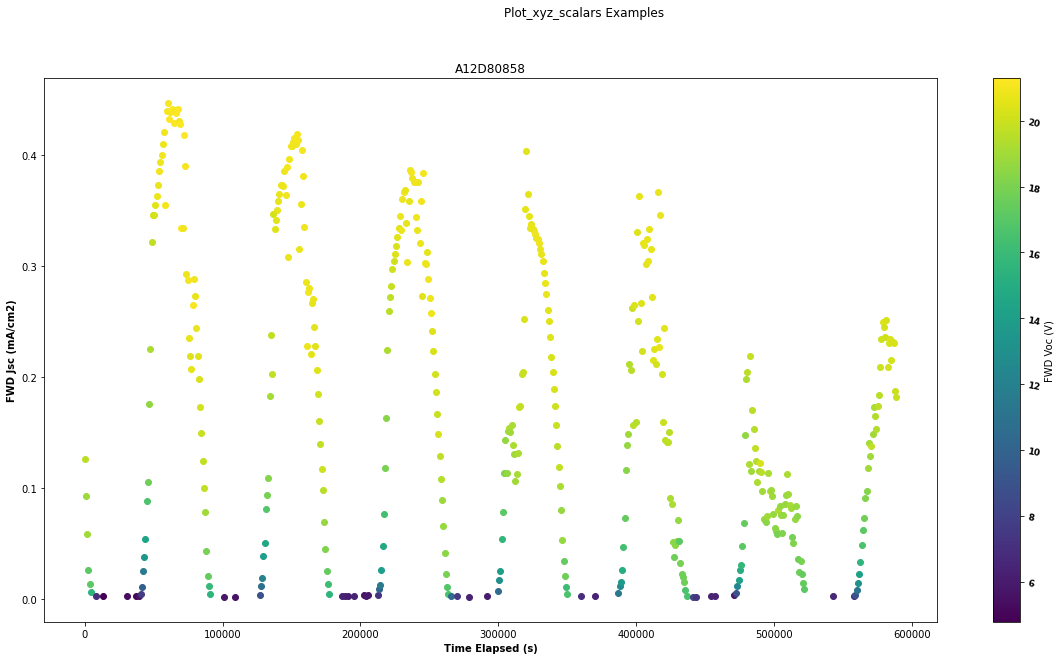

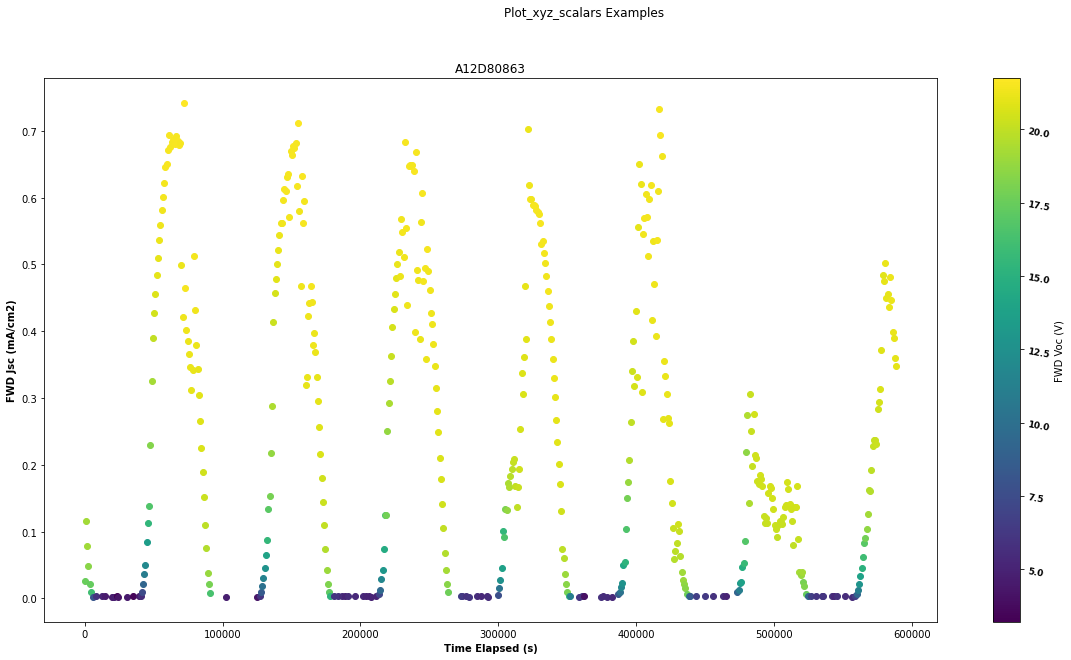

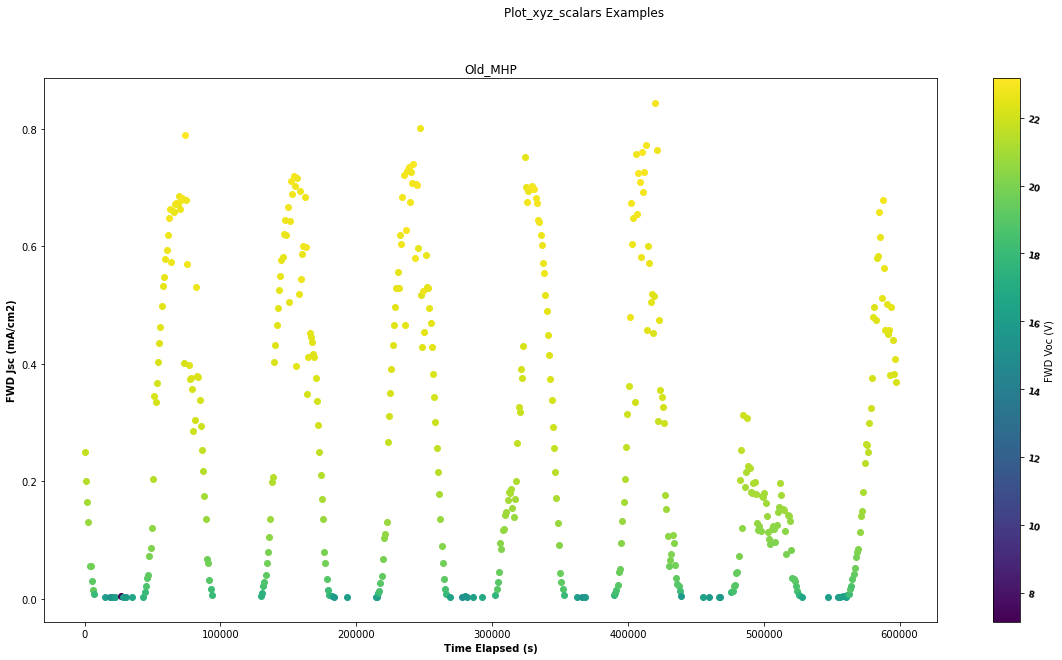

In [20]:
plt.clf()

# Cycle through each testfile
for idx, sublist in enumerate(files_to_plot):
    
    figure, axes = plt.subplots(1)
    
    # Cycle through each file
    for file in sublist: 
        
        # Plot
        grapher.plot_xyz_scalars(
            paramfile = file,
            x = grapher.variable_dict[x_axis], 
            y = grapher.variable_dict[y_axis],
            z = grapher.variable_dict[z_axis], 
            ax = axes,
            )
    
    axes.set_title(filestructure.filepath_to_runinfo(files_to_plot[idx][0])['name'])
    figure.suptitle('Plot_xyz_scalars Examples')
    
figure.show()